Linear SVM

In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparame‐
ter: a smaller C value leads to a wider street but more margin violations. Figure 5-4
shows the decision boundaries and margins of two soft margin SVM classifiers on a
nonlinearly separable dataset

If your SVM model is overfitting, you can try regularizing it by
reducing C.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:

svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

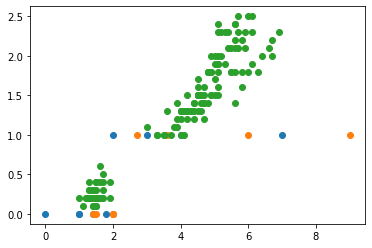

In [ ]:

x_new=np.array([[0.,2.],[1.4,1.5],[1.8,2],[2.,2.7],[7,9]  ,[4,6],[1,1.4],[3,3.6],[1,2]])

pre=svm_clf.predict(x_new)
plt.scatter(x_new[:,0],pre)
plt.scatter(x_new[:,1],pre)
plt.scatter(X[:,0],X[:,1])

Unlike Logistic Regression classifiers, SVM classifiers do not out‐
put probabilities for each class

Nonlinear SVM Classication

In [ ]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

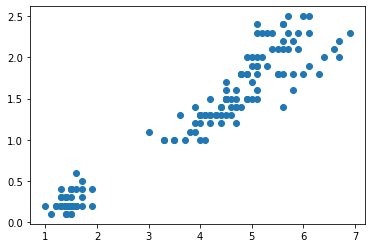

In [ ]:
plt.scatter(X[:,0],X[:,1])

Polynomial Kernel

In [ ]:

from sklearn.svm import SVC


poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

 The hyperparameter coef0 controls how much the model is influenced by high-
degree polynomials versus low-degree polynomials.

A common approach to find the right hyperparameter values is to
use grid search (see Chapter 2). It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparame‐
ter space.

Gaussian RBF Kernel

In [ ]:

rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐
fitting, you should increase it (similar to the C hyperparameter).

a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.
Then if you have spare time and computing power, you can also
experiment with a few other kernels using cross-validation and grid
search, especially if there are kernels specialized for your training
set’s data structure.


LinearSVC           O(m × n)    

SGDClassifier        O(m × n)    

SVC                  O(m² × n) to O(m³ × n)

SVM Regression

. The width of the street is controlled by a hyperparame‐
ter ϵ. Figure 5-10 shows two linear SVM Regression models trained on some random
linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =
0.5).

In [ ]:

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

To tackle nonlinear regression tasks, you can use a kernelized SVM model.

In [ ]:

from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

Exercise

shape : (60000, 28, 28)


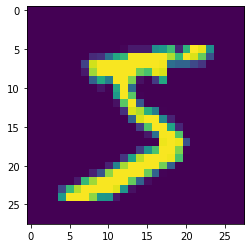

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

number=0
print('shape :',x_train.shape)
plt.imshow(x_train[number])

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

first we use high complexity model O(m^2*n)

In [ ]:

%%time


from sklearn.multiclass import OneVsRestClassifier


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


model1= Pipeline([
("scaler", StandardScaler()),
('onevsall', OneVsRestClassifier(SVC(kernel="poly", degree=3, random_state= 2,coef0=1, C=5,max_iter=100))),
])


model1.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-proce

CPU times: user 1min 19s, sys: 389 ms, total: 1min 20s
Wall time: 1min 20s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('onevsall',
                 OneVsRestClassifier(estimator=SVC(C=5, coef0=1, kernel='poly',
                                                   max_iter=100,
                                                   random_state=2)))])

model complexity is O(m*n)

In [ ]:
model1.score(x_test,y_test)

0.7604

In [ ]:

%%time

model2= Pipeline([
("poly_features", PolynomialFeatures(degree=2)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=3, max_iter=100,random_state=2,loss="hinge"))
])

model2.fit(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)